In [3]:
import xarray as xr
from postprocess.error_distribution import histograms_to_biais_rmse
import numpy as np

working_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_7'
ndsis = np.arange(20,56,5)
biais_viirs, rmse_viirs, biais_modis, rmse_modis = [],[],[],[]
for ndsi in ndsis:
    ds = xr.open_dataset(f'{working_folder}/ndsi_{ndsi}/analyses/uncertainty/uncertainty_WY_2023_2024_nasa_l3_snpp_vs_s2_theia.nc').sel(altitude_bins=slice(900,None))
    result = histograms_to_biais_rmse(metrics_dataset=ds)
    biais_viirs.append(result.biais.values)
    rmse_viirs.append(result.rmse.values)
    ds = xr.open_dataset(f'{working_folder}/ndsi_{ndsi}/analyses/uncertainty/uncertainty_WY_2023_2024_nasa_l3_terra_vs_s2_theia.nc').sel(altitude_bins=slice(900,None))
    result = histograms_to_biais_rmse(metrics_dataset=ds)
    biais_modis.append(result.biais.values)
    rmse_modis.append(result.rmse.values)


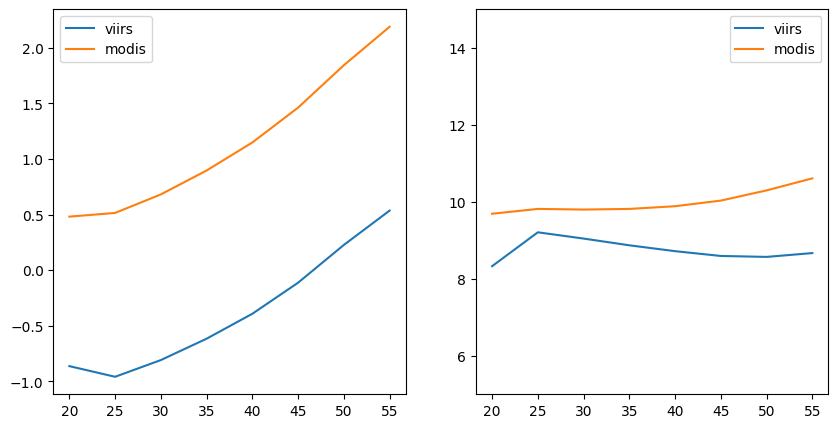

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].plot(ndsis, biais_viirs, label='viirs')
ax[0].plot(ndsis, biais_modis, label='modis')
ax[0].legend()
ax[1].plot(ndsis, rmse_viirs, label='viirs')
ax[1].plot(ndsis, rmse_modis, label='modis')
ax[1].set_ylim(5,15)
ax[1].legend()

In [5]:
from postprocess.skill_scores import compute_score


acc_viirs, f1_viirs, acc_modis, f1_modis = [],[],[],[]
for ndsi in ndsis:
    ds = xr.open_dataset(f'/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_7/ndsi_{ndsi}/analyses/confusion_table/confusion_table_WY_2023_2024_nasa_l3_snpp_vs_s2_theia.nc').sel(altitude_bins=slice(900,None))
    acc_viirs.append(compute_score(ds, 'accuracy'))
    f1_viirs.append(compute_score(ds, 'f1_score'))
    ds = xr.open_dataset(f'/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_7/ndsi_{ndsi}/analyses/confusion_table/confusion_table_WY_2023_2024_nasa_l3_terra_vs_s2_theia.nc').sel(altitude_bins=slice(900,None))
    acc_modis.append(compute_score(ds, 'accuracy'))
    f1_modis.append(compute_score(ds, 'f1_score'))

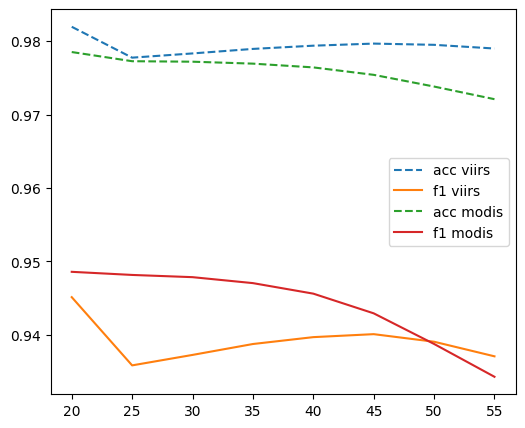

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots( figsize =(6,5))
ax.plot(ndsis, acc_viirs,'--', label='acc viirs')
ax.plot(ndsis, f1_viirs, label='f1 viirs')
ax.plot(ndsis, acc_modis,'--', label='acc modis')
ax.plot(ndsis, f1_modis, label='f1 modis')
ax.legend()